In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers  #모듈(변수나 함수를 포함)만 불러오기

# BMI 데이터를 읽어 들이고 정규화하기
df = pd.read_csv('colresult.csv')

In [2]:
print(df)

          발매가  브랜드  라인  콜라보       검색량  month  day  color_num  col1  col2  \
0      259000    3  21    0  2.072390      4    0          1     9     0   
1      259000    3  21    0  1.961860      4    1          1     9     0   
2      259000    3  21    0  1.975680      4    2          1     9     0   
3      259000    3  21    0  1.878970      4    3          1     9     0   
4      259000    3  21    0  1.782260      4    4          1     9     0   
...       ...  ...  ..  ...       ...    ...  ...        ...   ...   ...   
43948  209000    5  28   40  0.165783     10   88          1     9     0   
43949  209000    5  28   40  0.165783     10   89          1     9     0   
43950  209000    5  28   40  0.165783     10   90          1     9     0   
43951  209000    5  28   40  0.165783     10   91          1     9     0   
43952  209000    5  28   40  0.165783     10   92          1     9     0   

       col3  col4  col5  type  
0         0     0     0    ok  
1         0     0     0

In [4]:
df = df.sample(frac=1).reset_index(drop=True)

In [5]:
df.dtypes

발매가            int64
브랜드            int64
라인             int64
콜라보            int64
검색량          float64
month          int64
day            int64
color_num      int64
col1           int64
col2           int64
col3           int64
col4           int64
col5           int64
type          object
dtype: object

In [6]:
df = df[0:40000]

In [7]:
print(df)

          발매가  브랜드  라인  콜라보       검색량  month  day  color_num  col1  col2  \
0      279000    3  19    0  0.082890     11   73          1     9     0   
1      149000    3  24    0  0.138150      2   56          1     9     0   
2      119000    2   9    0  0.151968      4    7          2     3     5   
3      169000    1   1   18  0.069076     12   85          3    11    11   
4      129000    1  29    0  0.069075      1   63          2     3    13   
...       ...  ...  ..  ...       ...    ...  ...        ...   ...   ...   
39995  129000    3  17    0  0.082892      7   81          2     9     7   
39996  109000    1   8    0  0.069076      4   46          3    13    11   
39997  129000    1  29    0  0.069075      1   31          2     3    13   
39998  119000    1  29    0  0.524990      1   75          3    11     7   
39999  229000    2  12    0  0.069076      4   10          3     2     5   

       col3  col4  col5    type  
0         0     0     0      ok  
1         0     0  

In [8]:
yx = df["type"]

In [9]:
print(yx)

0            ok
1            ok
2            ok
3        double
4            ok
          ...  
39995        ok
39996      none
39997        ok
39998    double
39999      none
Name: type, Length: 40000, dtype: object


In [10]:
X = df.iloc[:,0:7]
X=np.asarray(X).astype(np.int)
y = np.empty((40000,3))

<ipython-input-10-cfa56e912779>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X=np.asarray(X).astype(np.int)


In [11]:
for i in range(40000):
    if yx[i] == "none":
        y[i] = [1, 0, 0]
    elif yx[i] == "ok":
        y[i] = [0, 1, 0]
    else:
        y[i] = [0, 0, 1]

In [12]:
# 훈련 전용 데이터와 테스트 전용 데이터로 나누기
X_train, y_train = X[0:30000], y[0:30000]
X_test,  y_test  = X[30000:40000], y[30000:40000]

In [13]:
model = tf.keras.Sequential()  
model.add(layers.Dense(28, input_shape=(7,)))  
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.02))        

model.add(layers.Dense(32))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.02))

model.add(layers.Dense(64))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.02))

model.add(layers.Dense(32))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.02))

model.add(layers.Dense(3))
model.add(layers.Activation('softmax')) 

# 모델 구축
model.compile(
    loss='categorical_crossentropy', 
    optimizer="rmsprop",   
    metrics=['accuracy'])  

In [14]:
hist = model.fit(
    X_train, y_train,
    batch_size= 50,  
    epochs=100,       
    validation_split = 0.2,  
    shuffle = False,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)],  
    verbose=1) 

# 테스트 데이터로 평가
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Epoch 1/100
480/480 [==============================] - 1s 2ms/step - loss: 803.1110 - accuracy: 0.3751 - val_loss: 1.0944 - val_accuracy: 0.3693- ETA: 0s - loss: 1410.4391 - accuracy
Epoch 2/100
480/480 [==============================] - 1s 2ms/step - loss: 1.9984 - accuracy: 0.4439 - val_loss: 1.0358 - val_accuracy: 0.4540
Epoch 3/100
480/480 [==============================] - 1s 2ms/step - loss: 1.1294 - accuracy: 0.4580 - val_loss: 1.0327 - val_accuracy: 0.4540
Epoch 4/100
480/480 [==============================] - 1s 2ms/step - loss: 1.0788 - accuracy: 0.4581 - val_loss: 1.0328 - val_accuracy: 0.4540
Epoch 5/100
480/480 [==============================] - 1s 2ms/step - loss: 1.1678 - accuracy: 0.4582 - val_loss: 1.0329 - val_accuracy: 0.4540
Epoch 6/100
480/480 [==============================] - 1s 2ms/step - loss: 1.0549 - accuracy: 0.4580 - val_loss: 1.0329 - val_accuracy: 0.4540
Epoch 7/100
480/480 [==============================] - 1s 2ms/step - loss: 1.1441 - accuracy: 0.4580 -

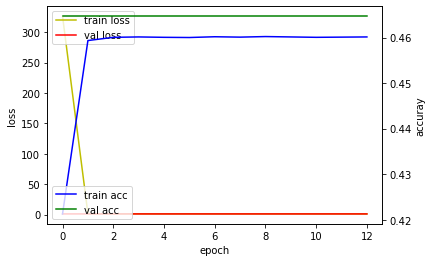

In [14]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()